In [70]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN, AgglomerativeClustering, AffinityPropagation
import sklearn.cluster as cl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [56]:
data=np.random.rand(100,2)

In [57]:
df= pd.DataFrame(data, columns=['x','y'])
df.head()

,x,y
0,0.358058,0.512550
1,0.410547,0.302231
2,0.626530,0.047063
3,0.295253,0.939231
4,0.871386,0.491830


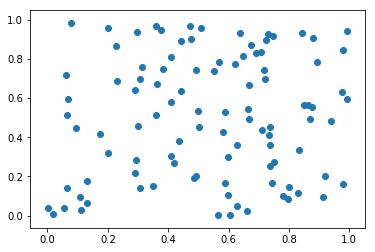

In [58]:
plt.scatter(df['x'], df['y'])

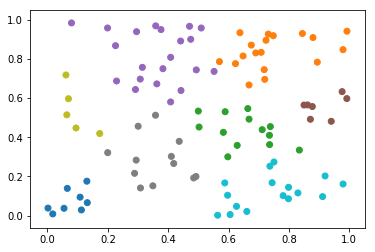

In [75]:
#KMeans as implemented in scikit learn, which uses kmeans++ to initialize and Lloyd's algorithm
#note that distance metric is never chosen by the user

kmeans=KMeans(n_clusters=8)
kmeans.fit(df)
cAssign=kmeans.predict(df)

plt.scatter(df['x'],df['y'], c=cAssign, cmap='tab10')

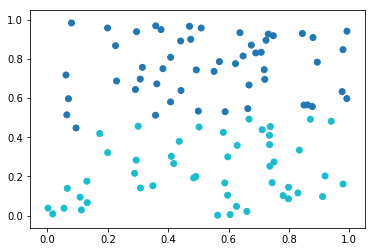

In [76]:
#demonstrating the meanshift algorithm
meanShift=MeanShift()
meanShift.fit(df)
cAssign=meanShift.predict(df)

plt.scatter(df['x'],df['y'], c=cAssign, cmap='tab10')

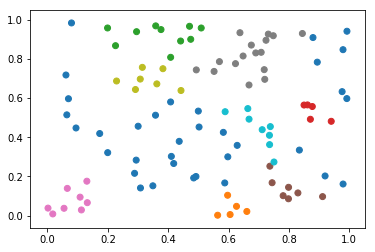

In [64]:
dbscan=DBSCAN(eps=0.1,min_samples=5)
#dbscan.fit(df)
cAssign=dbscan.fit_predict(df)

plt.scatter(df['x'],df['y'],c=cAssign, cmap='tab10')

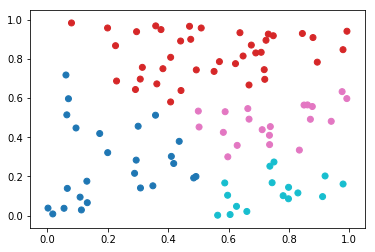

In [67]:
#agglomerative clustering in sklearn gives us lots of distance/proximity metrics to choose from
#these are defined in the affinity variable

#linkage parameter had to be average or complete rather than ward in order to use non-euclidean distance metrics
agglo=AgglomerativeClustering(n_clusters=4, affinity='l1', linkage='average')
cAssign=agglo.fit_predict(df)

plt.scatter(df['x'],df['y'],c=cAssign, cmap='tab10')

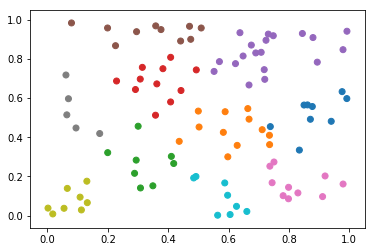

In [73]:
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html#sklearn.cluster.AffinityPropagation

affProp=AffinityPropagation()
affProp.fit(df)
cAssign=affProp.predict(df)
plt.scatter(df['x'],df['y'],c=cAssign, cmap='tab10')

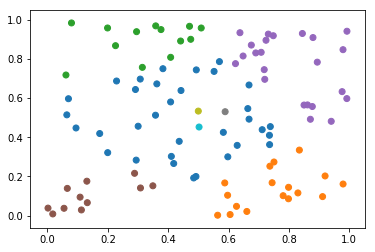

In [74]:
#documentation: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering

from sklearn.cluster import SpectralClustering
spectral=SpectralClustering()
cAssign=spectral.fit_predict(df)
plt.scatter(df['x'],df['y'],c=cAssign, cmap='tab10')

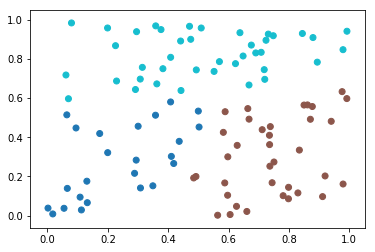

In [80]:
#http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

from sklearn.mixture import GaussianMixture

gm=GaussianMixture(n_components=3).fit(df)
cAssign=gm.predict(df)

plt.scatter(df['x'],df['y'],c=cAssign,cmap='tab10')

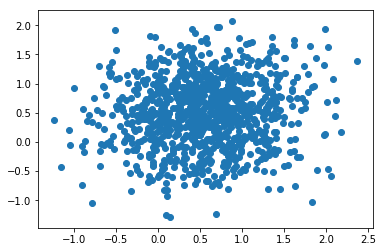

In [100]:
#KDE 
#http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity

from sklearn.neighbors import KernelDensity

kd=KernelDensity(bandwidth=0.5, kernel="gaussian")
kd.fit(df)

newData=kd.sample(1000)

plt.scatter(newData[:,0],newData[:,1])

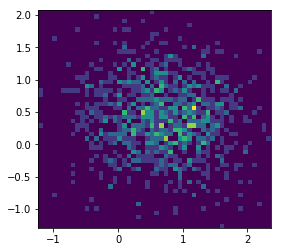

In [101]:
heatmap,xedges,yedges=np.histogram2d(newData[:,0],newData[:,1],bins=(50,50))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.clf()
plt.imshow(heatmap, extent=extent)
plt.show()